# 패키지 호출

In [1]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic",
        rc={"axes.unicode_minus": False},
        style='darkgrid')

# 데이터 호출

In [2]:
출상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv')
출하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 출근 (하선,외선).csv')
퇴상내 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (상선,내선).csv')
퇴하외 = pd.read_csv('교내통계경진대회_데이터셋 - 2022년 퇴근 (하선,외선).csv')
출상내1 = 출상내[출상내['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출하외1 = 출하외[출하외['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴상내1 = 퇴상내[퇴상내['호선명'].isin([2, 3, 4, 7])].reset_index(drop=True)
퇴하외1 = 퇴하외[퇴하외['호선명'].isin([2, 5, 6, 7])].reset_index(drop=True)
출상내1 = 출상내1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
출하외1 = 출하외1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴상내1 = 퇴상내1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)
퇴하외1 = 퇴하외1.drop(['호선명', '지하철역', '위도', '경도', '상세주소'], axis = 1)

하선 외선 출근 노선: 2,3,4,7 <br>
하선 외선 퇴근 노선:2,5,6,7 <br>
상선 내선 출근 노선:2,5,6,7 <br>
상선 내선 퇴근 노선:2,3,4,7 <br>

In [3]:
퇴상내1

,총층수,퇴근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",열차내 사고,역구내 사고,출입문관련,승강설비관련,발빠짐,기타,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"퇴근시간 혼잡도 평균(상선,내선)",퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW
0,3,4.543860,231421,306995,194665,133157,175540,102460,831736.50000,3,2,0,4,0,2,0,8,5,0,1,6,1,4,105.528571,63623,64662,13830,28290,4255,6819,77414,176616,25441,54152,44573,14110,31901,3743,9226,53525,53178,14839
1,2,4.517241,55399,60433,42352,75872,104712,74744,315529.91670,3,0,0,3,1,0,0,4,9,0,0,7,0,5,33.257143,28194,51770,6347,23286,6113,6125,17597,59279,5337,31968,43201,6049,29350,5317,7344,19731,74491,5656
2,5,4.508475,71707,82653,62600,104416,148210,99593,374320.83330,3,0,0,4,2,0,0,6,11,1,2,2,2,6,38.771429,59948,60871,9841,34947,4969,13926,19069,57530,8332,83523,47796,8416,58633,5727,14133,56398,82202,11638
3,3,4.556522,94092,133499,62492,59247,71156,40900,367315.66670,2,0,1,13,1,0,0,15,6,0,2,4,2,2,111.600000,42097,48426,9262,27828,4485,7197,41261,109678,11762,38798,46772,9906,24652,4079,6245,33489,53051,12053
4,3,4.663717,125847,211812,99898,101032,155570,124825,731249.16670,3,1,0,3,5,4,0,13,10,1,0,8,0,6,68.985714,38836,63695,11051,16667,6515,5802,71899,243316,13081,38540,34550,12178,36146,4952,11557,41971,65567,10264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2,4.888889,13554,13591,7128,26117,44417,36192,147597.83330,3,0,0,0,0,0,0,0,8,2,1,5,1,5,20.828571,12648,23816,3366,22017,2030,7425,8015,28886,2705,13368,51565,5421,10374,2298,3612,9568,103555,4617
142,4,4.934272,61987,107824,51517,19783,20520,13292,244815.25000,2,0,1,0,1,0,0,2,8,2,0,10,0,6,90.528571,114472,119337,23735,14521,1989,3625,95531,229096,17762,82460,23273,13114,55101,1845,11507,73371,25196,16851
143,4,5.084541,18596,18903,11053,17195,23813,20865,95405.08333,3,0,0,1,0,0,0,1,8,1,2,11,2,7,65.185714,29099,56466,6991,32461,4720,11188,12478,48988,4936,34717,62628,7062,34661,4615,8783,24630,93542,6990
144,3,5.107843,28767,24149,13536,34821,53025,51620,246439.00000,3,0,0,0,0,0,0,0,20,1,2,10,2,7,51.757143,5715,9119,903,17267,2070,5660,2403,7411,990,6443,30114,1678,4883,2929,1200,2080,36888,1311


# 퇴근 상선 내선

In [4]:
selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)', 
                         '열차내 사고',
                         '역구내 사고', 
                         '출입문관련', 
                         '승강설비관련', 
                         '발빠짐',
                         '기타',
                         '총사고발생수',
                         '반경 내 학교 수',
                         '반경 내 주요공원 수', 
                         '반경 내 대학 수',
                         '반경 아파트 수',
                         '반경 내 대학교 수',
                         '공공 자전거 시설 수',
                       '총층수']
퇴상내1 = 퇴상내1.drop(columns=selected_columns);

# '승차인원' 변수 생성
퇴상내1['승차인원'] = 퇴상내1['승차인원_1718'] + 퇴상내1['승차인원_1819'] + 퇴상내1['승차인원_1920']

# '하차인원' 변수 생성
퇴상내1['하차인원'] = 퇴상내1['하차인원_1718'] + 퇴상내1['하차인원_1819'] + 퇴상내1['하차인원_1920']

# 필요한 변수들 제거
variables_to_drop = ['승차인원_1718', '승차인원_1819', '승차인원_1920', '하차인원_1718', '하차인원_1819', '하차인원_1920',
                    '퇴근출발_EE', '퇴근출발_EH', '퇴근출발_EW', '퇴근도착_EE', '퇴근도착_EH', '퇴근도착_EW']
퇴상내1.drop(columns=variables_to_drop, inplace=True)

# 결과 확인
퇴상내1

,퇴근_상내선_배차간격,환승유입인원수,"퇴근시간 혼잡도 평균(상선,내선)",퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW,승차인원,하차인원
0,4.543860,831736.50000,105.528571,28290,4255,6819,77414,176616,25441,31901,3743,9226,53525,53178,14839,733081,411157
1,4.517241,315529.91670,33.257143,23286,6113,6125,17597,59279,5337,29350,5317,7344,19731,74491,5656,158184,255328
2,4.508475,374320.83330,38.771429,34947,4969,13926,19069,57530,8332,58633,5727,14133,56398,82202,11638,216960,352219
3,4.556522,367315.66670,111.600000,27828,4485,7197,41261,109678,11762,24652,4079,6245,33489,53051,12053,290083,171303
4,4.663717,731249.16670,68.985714,16667,6515,5802,71899,243316,13081,36146,4952,11557,41971,65567,10264,437557,381427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,4.888889,147597.83330,20.828571,22017,2030,7425,8015,28886,2705,10374,2298,3612,9568,103555,4617,34273,106726
142,4.934272,244815.25000,90.528571,14521,1989,3625,95531,229096,17762,55101,1845,11507,73371,25196,16851,221328,53595
143,5.084541,95405.08333,65.185714,32461,4720,11188,12478,48988,4936,34661,4615,8783,24630,93542,6990,48552,61873
144,5.107843,246439.00000,51.757143,17267,2070,5660,2403,7411,990,4883,2929,1200,2080,36888,1311,66452,139466


## scailing 

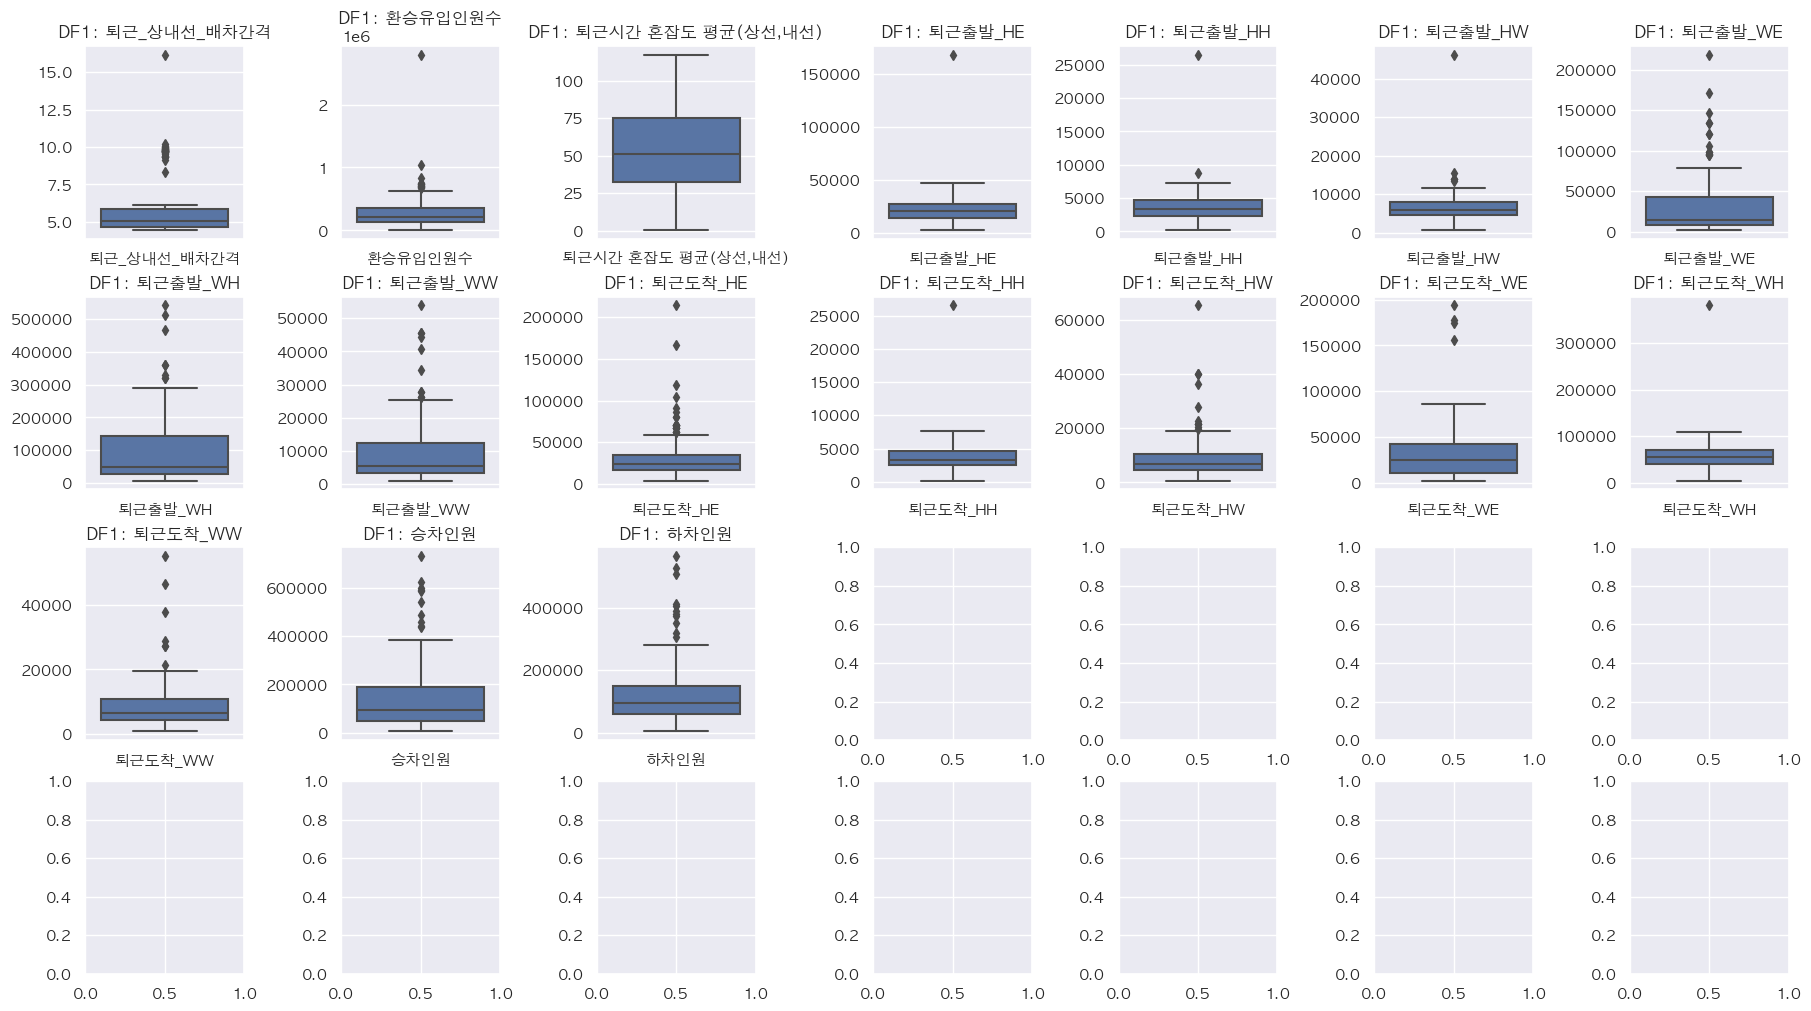

In [5]:

# 그래프를 그릴 캔버스 생성 (2개)
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

# 각 변수에 대한 Boxplot 그리기 (첫 번째 데이터프레임)
for i, variable in enumerate(퇴상내1.columns):
    sns.boxplot(x='variable', y='value', data=pd.melt(퇴상내1[[variable]]), ax=axes[i])
    axes[i].set_title(f'DF1: {variable}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

# 그래프 보여주기
plt.show()

In [6]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 스케일링할 변수들 선택
selected_columns = 퇴상내1.columns.difference(['퇴근시간 혼잡도 평균(상선,내선)'])
# RobustScaler 초기화
scaler = StandardScaler()

# 선택한 변수들에 대해 스케일링 수행
scaled_data = scaler.fit_transform(퇴상내1[selected_columns])
# 스케일링된 결과를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=[f"{var}_scaled" for var in selected_columns])


merged_df = pd.concat([퇴상내1, scaled_df], axis=1);
merged_df = merged_df.drop(selected_columns, axis=1)
merged_df

,"퇴근시간 혼잡도 평균(상선,내선)",승차인원_scaled,퇴근_상내선_배차간격_scaled,퇴근도착_HE_scaled,퇴근도착_HH_scaled,퇴근도착_HW_scaled,퇴근도착_WE_scaled,퇴근도착_WH_scaled,퇴근도착_WW_scaled,퇴근출발_HE_scaled,퇴근출발_HH_scaled,퇴근출발_HW_scaled,퇴근출발_WE_scaled,퇴근출발_WH_scaled,퇴근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,105.528571,4.211854,-0.728543,-0.005757,0.087266,0.034933,0.654425,-0.101591,0.812983,0.388608,0.205063,0.064704,1.180538,0.787673,1.658828,2.775963,1.897347
1,33.257143,0.113251,-0.740975,-0.095451,0.742588,-0.196026,-0.396024,0.486991,-0.390012,0.062373,0.935641,-0.096692,-0.415046,-0.371707,-0.426291,1.256816,0.093169
2,38.771429,0.532282,-0.745069,0.934147,0.913288,0.637119,0.743729,0.699938,0.393644,0.822609,0.485813,1.717501,-0.375781,-0.388988,-0.115660,2.201388,0.298648
3,111.600000,1.053597,-0.722629,-0.260634,0.227157,-0.330895,0.031628,-0.105098,0.448010,0.358488,0.295500,0.152611,0.216178,0.126274,0.240088,0.437673,0.274164
4,68.985714,2.104980,-0.672564,0.143498,0.590623,0.320993,0.295282,0.240545,0.213647,-0.369150,1.093710,-0.171809,1.033429,1.446720,0.376891,2.486131,1.546137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,20.828571,-0.770145,-0.567399,-0.762653,-0.514347,-0.654016,-0.711929,1.289624,-0.526123,-0.020359,-0.669823,0.205635,-0.670640,-0.672013,-0.699273,-0.191876,-0.493765
142,90.528571,0.563423,-0.546203,0.809961,-0.702950,0.314857,1.271316,-0.874344,1.076560,-0.509058,-0.685944,-0.678090,1.663799,1.306216,0.862388,-0.709840,-0.153983
143,65.185714,-0.668346,-0.476021,0.091285,0.450316,-0.019432,-0.243744,1.013105,-0.215255,0.660535,0.387904,1.080755,-0.551592,-0.473390,-0.467881,-0.629139,-0.676182
144,51.757143,-0.540732,-0.465137,-0.955718,-0.251636,-0.950016,-0.944685,-0.551456,-0.959217,-0.330033,-0.654094,-0.204832,-0.820337,-0.884202,-0.877147,0.127300,-0.148308


## PCA

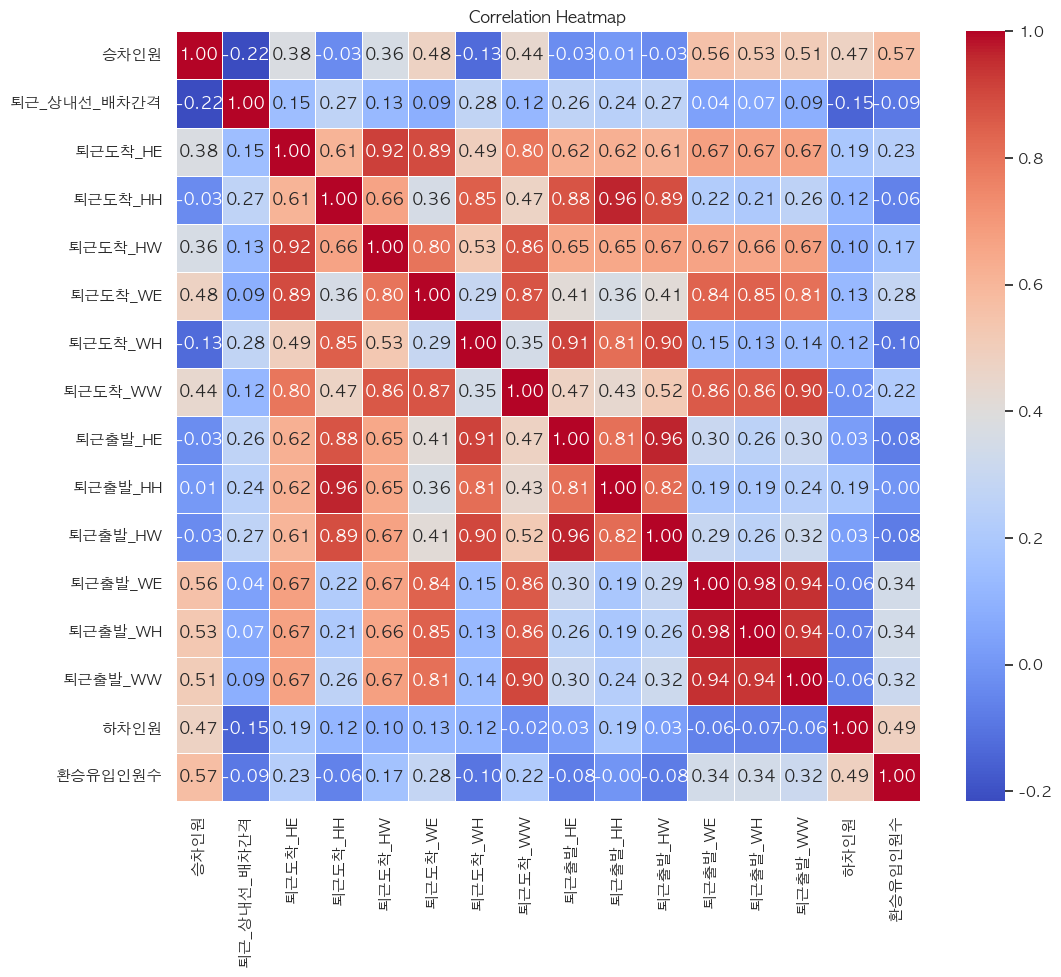

In [7]:
# 히트맵 데이터 추출
heatmap_data = 퇴상내1[selected_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# 데이터 분할
target = merged_df['퇴근시간 혼잡도 평균(상선,내선)']
data = merged_df.drop('퇴근시간 혼잡도 평균(상선,내선)', axis=1)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(data)
퇴상내pca = pca.transform(data)
print(퇴상내pca.shape)

(146, 3)


In [10]:
print(pca.explained_variance_ratio_)

[0.49228879 0.22783688 0.10789513]


In [11]:
# 주성분 벡터 출력
components_df = pd.DataFrame(pca.components_, columns=data.columns)
print("주성분 벡터:")
components_df

주성분 벡터:


,승차인원_scaled,퇴근_상내선_배차간격_scaled,퇴근도착_HE_scaled,퇴근도착_HH_scaled,퇴근도착_HW_scaled,퇴근도착_WE_scaled,퇴근도착_WH_scaled,퇴근도착_WW_scaled,퇴근출발_HE_scaled,퇴근출발_HH_scaled,퇴근출발_HW_scaled,퇴근출발_WE_scaled,퇴근출발_WH_scaled,퇴근출발_WW_scaled,하차인원_scaled,환승유입인원수_scaled
0,0.140968,0.072414,0.324842,0.260517,0.328507,0.304987,0.227161,0.319837,0.267819,0.252142,0.270122,0.277417,0.272939,0.279561,0.042171,0.083692
1,-0.335658,0.162435,-0.032450,0.319673,-0.003384,-0.187465,0.355221,-0.147914,0.304421,0.300578,0.304332,-0.279278,-0.284673,-0.258418,-0.052048,-0.265195
2,0.344331,-0.224799,0.046878,0.099257,-0.001224,-0.053525,0.092650,-0.145189,0.023532,0.160825,0.019333,-0.170540,-0.184075,-0.183197,0.688002,0.435493


In [12]:
# 주성분의 고유값 출력
explained_variance_df = pd.DataFrame(pca.explained_variance_, columns=['Explained Variance'])
print("\n주성분의 고유값:")
explained_variance_df


주성분의 고유값:


,Explained Variance
0,7.930942
1,3.670531
2,1.738228


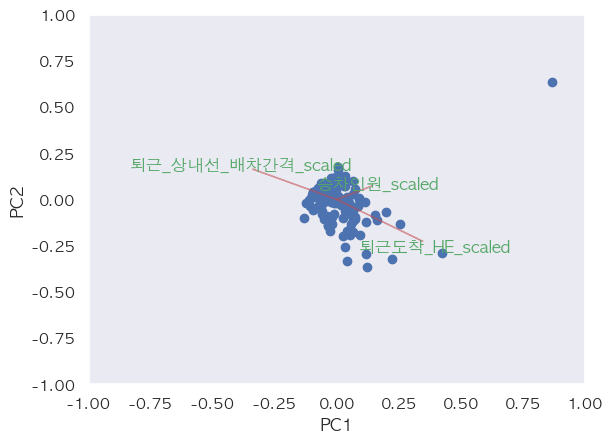

In [13]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
biplot(퇴상내pca, pca.components_, 1, 2, labels=components_df.columns)